# **Projet** : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

**Notre objectif est classifier de façon efficace et efficiente des fruits et légumes.**
- Pour ce faire, on propose un première base de données, *simple-database*, dans laquelle chaque photo présente un unique fruit sur fond blanc. La reconnaissance est par conséquent grandement facilitée et les résultats attendus proches des 90-100% de précision.
- Pour complexifier les choses, on optera dans un second temps pour une base de données, *realistic-database*, avec certes moins de classes, mais dont les photos sont moins évidentes, plus réalistes.
- Nous déterminerons ensuite les potentiels bienfaits d'une base de données hybride entre la première et la seconde, *hybrid-database*.

Enfin, parce que c'est amusant, nous avons soumis les candidats à l'élection présidentielle de 2022 au détecteur de fruit... 

<b> Paramètres globaux du document </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [31]:
import sys
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Version distante (1)
#!git clone https://github.com/EnzoN7/Image-classification.git
#path1 = "./Image-classification/databases/simple-database/"
#path2 = "./Image-classification/databases/realistic-database/"
#path3 = "./Image-classification/databases/hybrid-database/"
#pathAnnexe = "./Image-classification/databases/elections-maraichere-de-2022/"
#sys.path.insert(1, "./Image-classification/scripts/")
#sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path1 = "./databases/simple-database/"
path2 = "./databases/realistic-database/"
path3 = "./databases/hybrid-database/"
pathAnnexe = "./databases/elections-maraichere-de-2022/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from Load import load_data
from Plots import plot_training_analysis, plot_random_images, plot_candidates, print_false_values
from Tests import test_data
from BasicConvolutionalNetwork import BasicConvolutionalNetwork # Conseillé
from VGG16Network import VGG16Network                           # Déconseillé : trop lent
from InceptionV3Network import InceptionV3Network               # Déconseillé : apprentissage inadéquat

# **Partie 1** : simple-database

<b> Paramètres de la base de données</b>

x_train.shape = (7050, 100, 100, 3)
y_train.shape = (7050, 1)

x_validation.shape = (1478, 100, 100, 3)
y_validation.shape = (1478, 1)

x_test.shape = (1488, 100, 100, 3)
y_test.shape = (1488, 1)



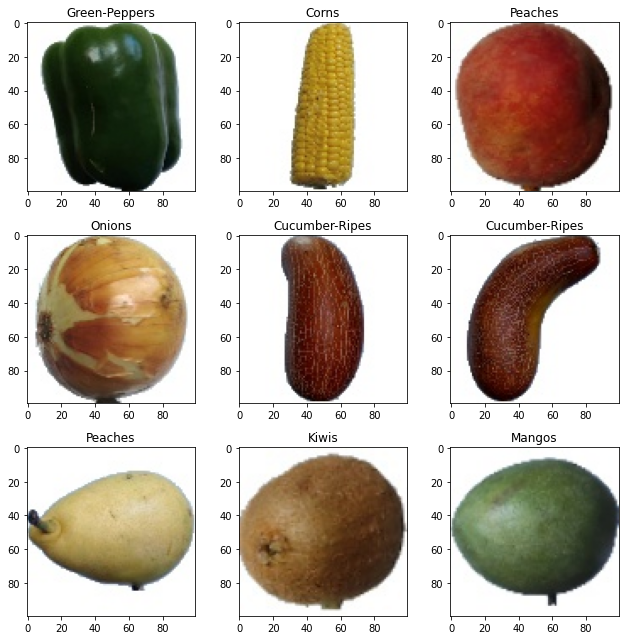

In [32]:
IMAGE_SIZE1 = 100
labels1 = ['Apples-Braeburn', 'Apples-Granny-Smith', 'Apricots',
          'Clementines','Corns', 'Cucumber-Ripes',
          'Green-Peppers', 'Kiwis', 'Lemons',
          'Limes', 'Mangos', 'Onions',
          'Oranges', 'Peaches', 'Pears',
          'Pineapples', 'Red-Peppers', 'Strawberries',
          'Tomatoes', 'Watermelons']

x_train1, y_train1 = load_data(path1, labels1, _imagesize=IMAGE_SIZE1)
x_val1, y_val1 = load_data(path1, labels1, _dataset='validation', _imagesize=IMAGE_SIZE1)
x_test1, y_test1 = load_data(path1, labels1, _dataset='test', _imagesize=IMAGE_SIZE1)

plot_random_images(x_train1, y_train1, labels1)

<b>Lancement de l'entraînement</b>

In [33]:
# Objet permettant d'augmenter davantage la taille de la base de données.
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train1, y_train1)
val_generator = train_datagen.flow(x_val1, y_val1)

model1 = BasicConvolutionalNetwork(len(labels1), IMAGE_SIZE1)

model1.build(input_shape=(None, IMAGE_SIZE1, IMAGE_SIZE1, 3))
model1.summary()
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model1.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          multiple                  896       
                                                                 
 conv2d_21 (Conv2D)          multiple                  18496     
                                                                 
 conv2d_22 (Conv2D)          multiple                  54238     
                                                                 
 conv2d_23 (Conv2D)          multiple                  108416    
                                                                 
 max_pooling2d_5 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée.
- <b>Evalutation du modèle</b> dans sa globalité.
- *(Affichage éventuel des prédictions râtées.)*

PREDICTIONS sur la donnée n°1261/1487
     Apples-Braeburn -> 0.14%
     Apples-Granny-Smith -> 0.00%
     Apricots -> 0.00%
     Clementines -> 0.00%
     Corns -> 0.00%
     Cucumber-Ripes -> 2.84%
     Green-Peppers -> 0.00%
     Kiwis -> 0.00%
     Lemons -> 0.00%
     Limes -> 0.00%
     Mangos -> 0.00%
     Onions -> 0.00%
     Oranges -> 0.00%
     Peaches -> 0.00%
     Pears -> 0.00%
     Pineapples -> 0.01%
     Red-Peppers -> 0.00%
     Strawberries -> 97.02%
     Tomatoes -> 0.00%
     Watermelons -> 0.00%

RESULTAT : Strawberries / 97.02%
ATTENDU  : Strawberries


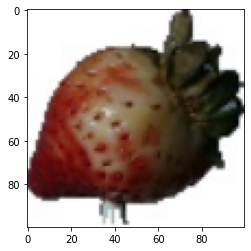

In [34]:
test_data(model1, labels1, x_test1, y_test1)

EVALUATION DU MODELE basic_convolutional_network_5
149/149 [==============================] - 2s 15ms/step - loss: 2.5241 - sparse_categorical_accuracy: 0.9214
LOSS     : 2.52
ACCURACY : 92.14%


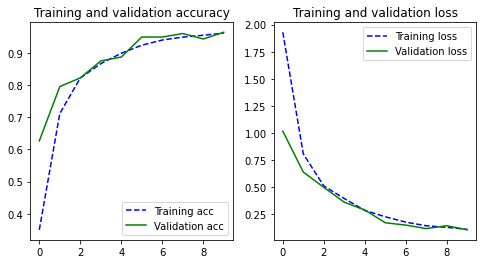

In [35]:
print("EVALUATION DU MODELE " + model1.name)
loss_and_metrics = model1.evaluate(x_test1, y_test1, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [36]:
#print_false_values(model1, labels1, x_test1, y_test1)

# **Partie 2** : realistic-database

**Paramètres de la base de données**

x_train.shape = (2922, 100, 100, 3)
y_train.shape = (2922, 1)

x_validation.shape = (600, 100, 100, 3)
y_validation.shape = (600, 1)

x_test.shape = (588, 100, 100, 3)
y_test.shape = (588, 1)



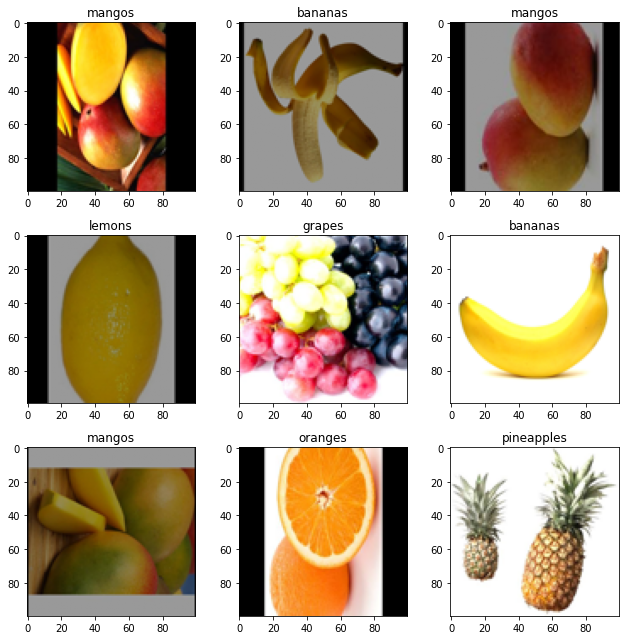

In [37]:
IMAGE_SIZE2 = 100
labels2 = ['apples', 'bananas', 'coconuts', 'grapes','lemons',
           'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train2, y_train2 = load_data(path2, labels2, _imagesize=IMAGE_SIZE2)
x_val2, y_val2 = load_data(path2, labels2, _dataset='validation', _imagesize=IMAGE_SIZE2)
x_test2, y_test2 = load_data(path2, labels2, _dataset='test', _imagesize=IMAGE_SIZE2)

plot_random_images(x_train2, y_train2, labels2)

**Lancement de l'entraînement**

In [38]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train2, y_train2)
val_generator = train_datagen.flow(x_val2, y_val2)

model2 = BasicConvolutionalNetwork(len(labels2), IMAGE_SIZE2)

model2.build(input_shape=(None, IMAGE_SIZE2, IMAGE_SIZE2, 3))
model2.summary()
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model2.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          multiple                  896       
                                                                 
 conv2d_25 (Conv2D)          multiple                  18496     
                                                                 
 conv2d_26 (Conv2D)          multiple                  54238     
                                                                 
 conv2d_27 (Conv2D)          multiple                  108416    
                                                                 
 max_pooling2d_6 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

PREDICTIONS sur la donnée n°368/587
     apples -> 5.75%
     bananas -> 0.00%
     coconuts -> 0.00%
     grapes -> 0.01%
     lemons -> 0.08%
     limes -> 0.00%
     mangos -> 55.88%
     oranges -> 4.63%
     pineapples -> 0.00%
     tomatoes -> 33.64%

RESULTAT : mangos / 55.88%
ATTENDU  : mangos


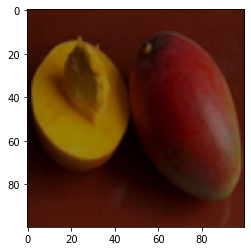

In [39]:
test_data(model2, labels2, x_test2, y_test2)

EVALUATION DU MODELE basic_convolutional_network_6
59/59 [==============================] - 1s 15ms/step - loss: 0.7675 - sparse_categorical_accuracy: 0.6786
LOSS     : 0.77
ACCURACY : 67.86%


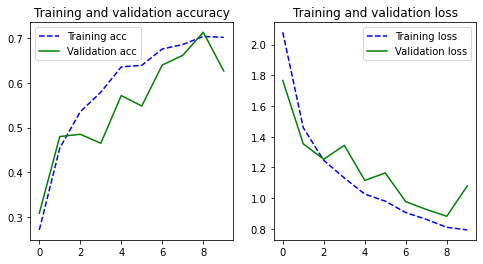

In [40]:
print("EVALUATION DU MODELE " + model2.name)
loss_and_metrics = model2.evaluate(x_test2, y_test2, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [41]:
#print_false_values(model2, labels2, x_test2, y_test2)

# **Partie 3** : hybrid-database

**Paramètres de la base de données**

x_train.shape = (6418, 100, 100, 3)
y_train.shape = (6418, 1)

x_validation.shape = (1164, 100, 100, 3)
y_validation.shape = (1164, 1)

x_test.shape = (898, 100, 100, 3)
y_test.shape = (898, 1)



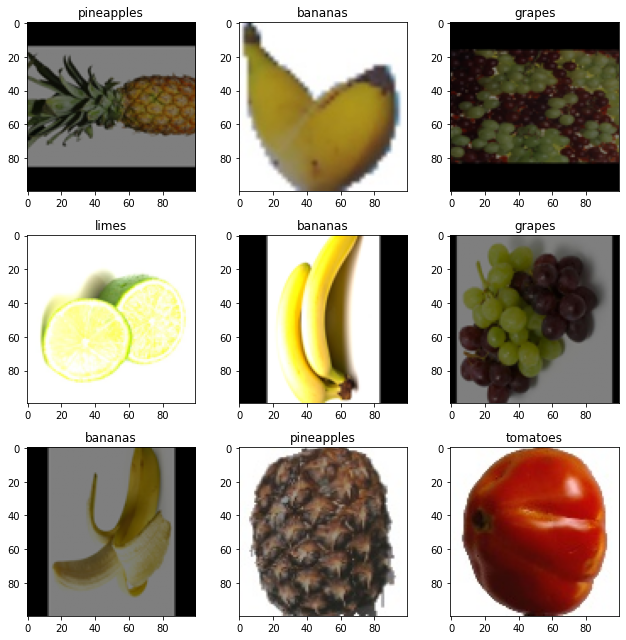

In [50]:
IMAGE_SIZE3 = 100
labels3 = ['apples', 'bananas', 'coconuts', 'grapes','lemons',
           'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train3, y_train3 = load_data(path3, labels3, _imagesize=IMAGE_SIZE3)
x_val3, y_val3 = load_data(path3, labels3, _dataset='validation', _imagesize=IMAGE_SIZE3)
x_test3, y_test3 = load_data(path3, labels3, _dataset='test', _imagesize=IMAGE_SIZE3)

plot_random_images(x_train3, y_train3, labels3)

**Lancement de l'entraînement**

In [51]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train3, y_train3)
val_generator = train_datagen.flow(x_val3, y_val3)

model3 = BasicConvolutionalNetwork(len(labels3), IMAGE_SIZE3)

model3.build(input_shape=(None, IMAGE_SIZE3, IMAGE_SIZE3, 3))
model3.summary()
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model3.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          multiple                  896       
                                                                 
 conv2d_33 (Conv2D)          multiple                  18496     
                                                                 
 conv2d_34 (Conv2D)          multiple                  54238     
                                                                 
 conv2d_35 (Conv2D)          multiple                  108416    
                                                                 
 max_pooling2d_8 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

PREDICTIONS sur la donnée n°208/897
     apples -> 0.15%
     bananas -> 0.22%
     coconuts -> 65.14%
     grapes -> 14.01%
     lemons -> 0.01%
     limes -> 0.03%
     mangos -> 0.05%
     oranges -> 0.01%
     pineapples -> 18.39%
     tomatoes -> 1.99%

RESULTAT : coconuts / 65.14%
ATTENDU  : coconuts


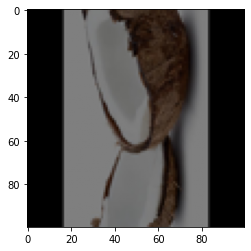

In [52]:
test_data(model3, labels3, x_test3, y_test3)

EVALUATION DU MODELE basic_convolutional_network_8
90/90 [==============================] - 1s 15ms/step - loss: 0.4776 - sparse_categorical_accuracy: 0.8330
LOSS     : 0.48
ACCURACY : 83.30%


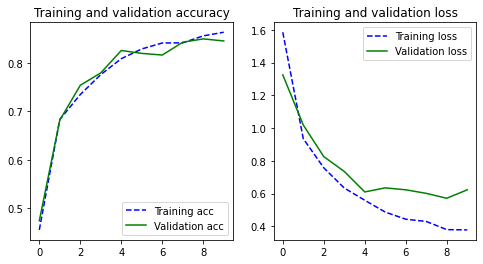

In [53]:
print("EVALUATION DU MODELE " + model3.name)
loss_and_metrics = model3.evaluate(x_test3, y_test3, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [54]:
#print_false_values(model3, labels3, x_test, y_test)

# **Annexe** : Quels fruits sont-ils ?

*Les candidats à l'élection maraîchère de 2022 se prêtent à l'exercice...*

x_test.shape = (12, 100, 100, 3)
y_test.shape = (12, 1)



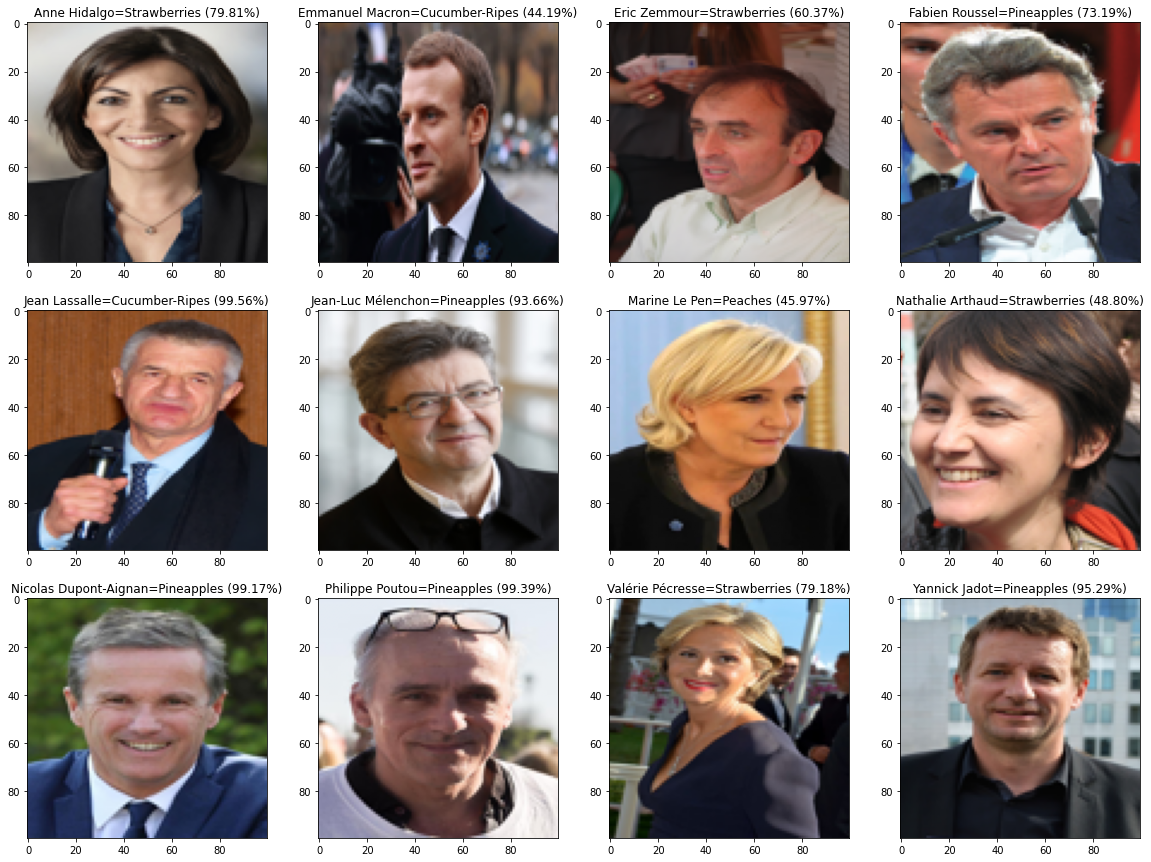

In [55]:
x_test, _ = load_data(pathAnnexe, labels1, _dataset="test", _imagesize=IMAGE_SIZE1)
plot_candidates(model1, labels1, x_test)